## Data Exploration Journey: ##

Objectives:
* To understand recording of mammals within the North East of England, attempt to highlight any species biases within recording, and highlight any geographical biases or less-recorded areas.
* Understand how recent events, such as the covid pandemic, have effected mammal recording, and whether we need to 'promote' submitting records or mammal surveying to better understand the populations and ecologies of mammals in the North East.

Overview
* Data Quality - check verification status and mention this as a caveat going foward
* How recording has changed across the years - did the pandemic effect it?
* Top Recorders, unique recorders
* Record observation style
* Number of unique taxons/species found
* Are species dead or alive? 
* ~~Common comments~~ (No time to do this)

Examining bias: 
* Top family records, and species level - do a split graph with species per family? Or an interactive graph where you can choose family
* Species records in general - do these match what we would expect? E.g. rat, rabbit - use images of the species
* ~~How have the most popular species changed over time? Dynamic graph with species selection~~ (No time to do this)
* Map of records - heatmap of locations - is there a bias towards nature reserves and populated areas? - Can we add shapefiles of reserves or link population data? - Remove sensitive species as geographical 'noise' is added to these

In [1]:
# Importing packages we need
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
# Importing the data
mammals_df = pd.read_csv("data/Mammals_clean.csv")

In [3]:
mammals_df.shape

(81141, 17)

In [4]:
#Change 'Date' to 'datetime' object
#mammals_df['Date'].head()
mammals_df["Date"] = pd.to_datetime(mammals_df["Date"], format = "%Y-%m-%d")

In [5]:
mammals_df['Date'].head()

0   2014-12-19
1   2015-12-20
2   2014-12-14
3   2014-12-05
4   2020-12-31
Name: Date, dtype: datetime64[ns]

# Introduction to the dataset #

Dataset started with 120,000 (ish) rows, after data cleaning it is x rows. <br>
Date is looking at: 2000 - 2023

#### Summary of data cleaning ####

## Data Exploration Overview ##

### Data Quality ###
First, I wish to look at the quality of the records supplied in the dataset, using the 'Verification status' attribute. 
When citizen scientists submit records to recording apps, they often need verifying by a county-recorder or expert in their field. This leads to a verification status of the record, which we can use to determine the quality or likelihood of a record being a true sighting.

Our different verification statuses have been simplified to:
* "Unconfirmed" - a plausible record, that may not yet have been reviewed by a verifier to read 'accepted' status. Some of these will be of poor quality and may end up being deleted if verification occurs in the future. Other records may not have enough evidence to be fully accepted but are logical sightings.
* "Accepted" - these records have likely been verified, or have enough evidence for technology to have made a logical decision to accept the record.

In [6]:
# First looking at unique values
mammals_df['Identification verification status'].value_counts()

Unconfirmed    58415
Accepted       22726
Name: Identification verification status, dtype: int64

From the above we can see that the majority of records are 'Unconfirmed' - we will have to consider this as we look at species, particularly for any species with low record counts.

## Add in some % stats here - 74% (???) of records are unconfirmed ##

#### Data Quality over the time period ####

In [7]:
#Picking out year
mammals_df['Year'] = mammals_df['Date'].dt.year

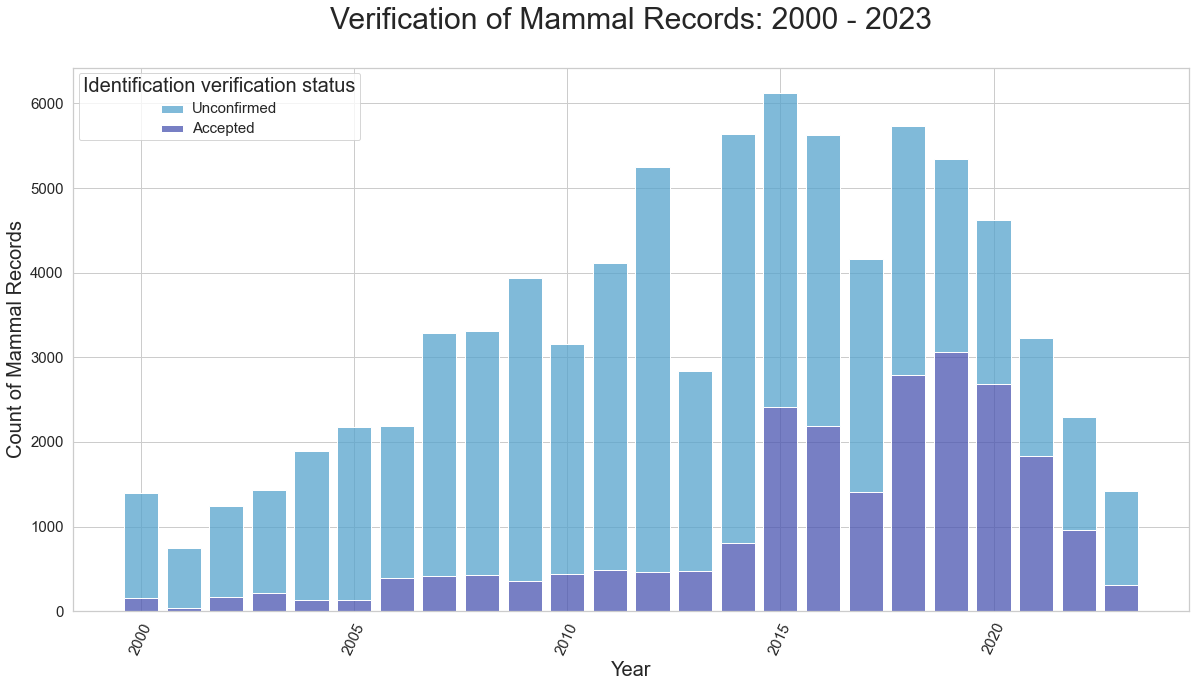

In [61]:
sns.set_theme(style='whitegrid', palette='icefire')
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.histplot(x=mammals_df['Year'], binwidth=1,
                   hue=mammals_df['Identification verification status'], multiple = "stack", discrete=True, shrink=.8)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Count of Mammal Records", fontsize=20)
ax.set_title("Verification of Mammal Records: 2000 - 2023\n", fontsize=30)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
plt.xticks(rotation=65, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

* Nice explanation on the graph - general increase in mammal recording. 
* Past few years won't be super accurate due to a time lag. 
* Looks like 2020 wasn't effected too much by the pandemic. 
* Not sure what happened in 2017!
* Generally more unverified records in more recent times - less time for people to verify more records.


## WHO is recording? ##

Info on public recording, different groups etc who may submit records. <br>
Not everyone chooses to use their name, so many are recorded as an ID number.

In [9]:
top10_recorders = mammals_df['Recorder'].value_counts().head(10)

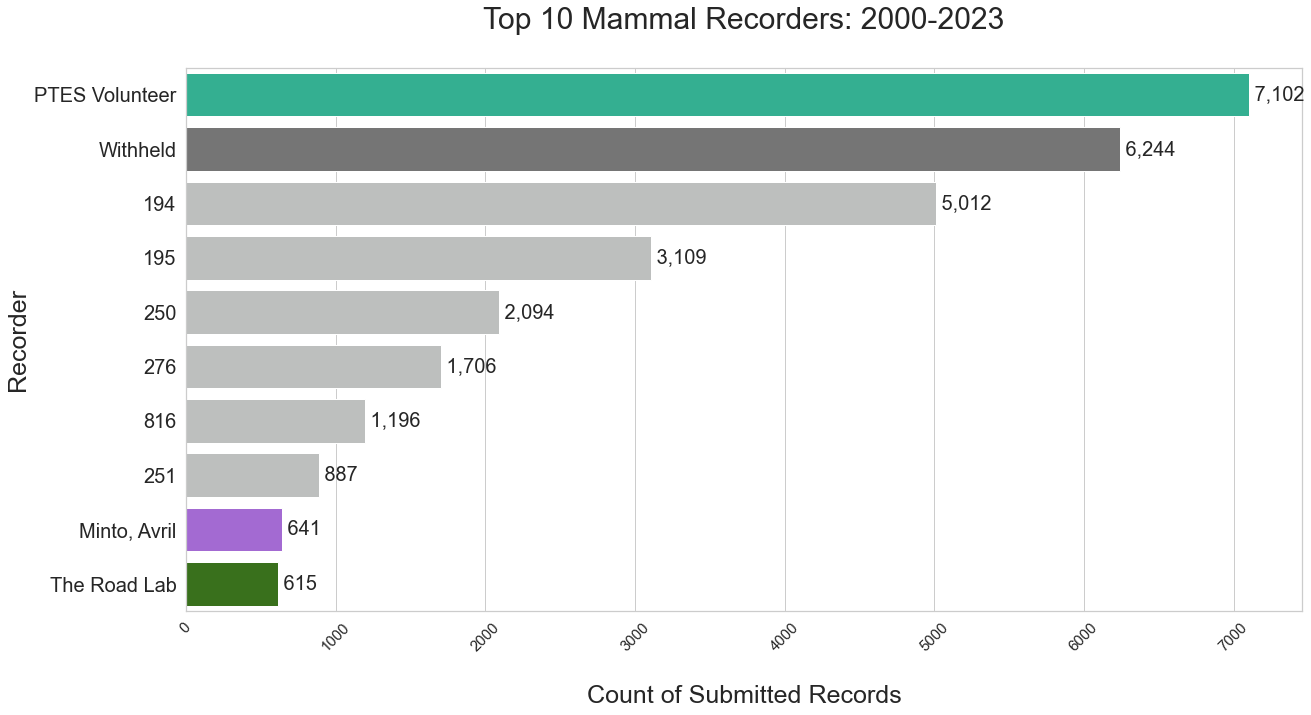

In [70]:
colors = ["#1FC49C", "#757575", "#BDBFBE", "#BDBFBE", "#BDBFBE",
         "#BDBFBE", "#BDBFBE", "#BDBFBE", "#A459E3", "#357E0E"]
sns.set_palette(sns.color_palette(colors))
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=top10_recorders, y=top10_recorders.index)
ax.set_xlabel("\nCount of Submitted Records", fontsize=25)
ax.set_ylabel("Recorder", fontsize=25)
ax.set_title("Top 10 Mammal Recorders: 2000-2023\n", fontsize=30)
ax.bar_label(ax.containers[0], fontsize=20, fmt=' {:,.0f}')
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.show()

* Nice explanation on the graph - find out % of records PTES have submitted.
* Explain who PTES are.
* Congrats to Avril as our top 'known' recorder.
* Highlight The Road Lab... good segway into next topic

<span style="color:#1FC49C">**PTES Colour**</span><br>
<span style="color:#A459E3">**Avril Colour**</span><br>
<span style="color:#357E0E">**The Road Lab Colour**</span><br>

## HOW are records gathered? ##

Various methods - with mammals we would expect mostly human observation, however as with The Road Lab, this can be with using roadkill as well as live specimens. <br>
With species like bats, there can also be technical observation involved, such as using tools which detect the frequencies of bat 'clicks'. 

In [11]:
mammals_df.columns

Index(['Scientific name', 'Common name', 'Taxon Rank', 'OSGR',
       'Latitude (WGS84)', 'Longitude (WGS84)', 'Recorder', 'Determiner',
       'Occurrence remarks', 'Identification verification status',
       'Basis of record', 'Data provider', 'Order', 'Family', 'Genus',
       'Vitality', 'Date', 'Year'],
      dtype='object')

In [12]:
mammals_df['Basis of record'].value_counts()

mammals_df['Vitality'].isna().value_counts()

True     71109
False    10032
Name: Vitality, dtype: int64

In [78]:
mammals_df['Basis of record'] = mammals_df['Basis of record'].replace("HumanObservation", "Human Observation")
mammals_df['Basis of record'] = mammals_df['Basis of record'].replace("MachineObservation", "Machine Observation")
mammals_df['Vitality'] = mammals_df['Vitality'].replace("alive", "Alive")
mammals_df['Vitality'] = mammals_df['Vitality'].replace("dead", "Dead")

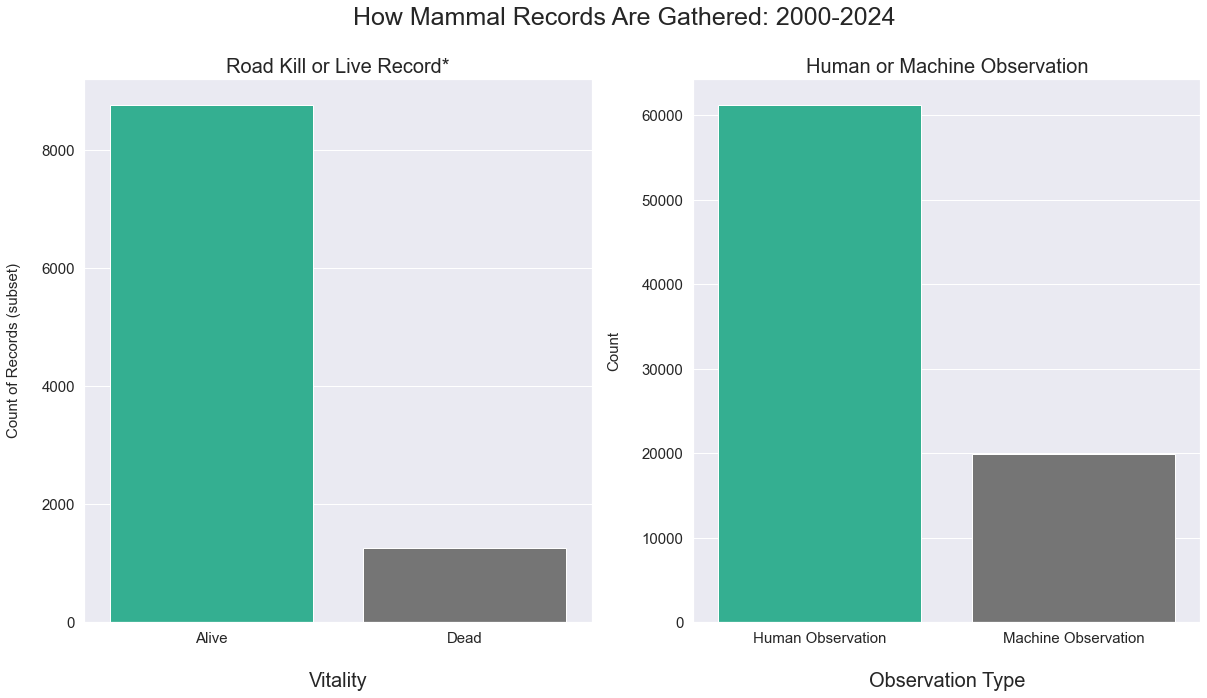

In [83]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2, figsize=(20,10))
fig.suptitle('How Mammal Records Are Gathered: 2000-2024', fontsize=25)
sns.countplot(ax=ax[0],x=mammals_df['Vitality'])
ax[0].set_title("Road Kill or Live Record*", fontsize=20)
ax[0].set_xlabel("\nVitality", fontsize=20)
ax[0].set_ylabel("Count of Records (subset)\n", fontsize=15)
ax[0].tick_params(labelsize=15) 
sns.countplot(ax=ax[1], x=mammals_df['Basis of record'])
ax[1].set_title("Human or Machine Observation", fontsize=20)
ax[1].set_xlabel("\nObservation Type", fontsize=20)
ax[1].set_ylabel("Count\n", fontsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

### Explain the graphs time ###
* Highlight the * in Road Kill graph - this is based on a subset of data as only 10,032 records hold this information.
* We can further explore the species that machine observation was used for to determine what kind of machine it was.


In [102]:
top_machine_obs = mammals_df[mammals_df['Basis of record']=="Machine Observation"]['Order'].value_counts()

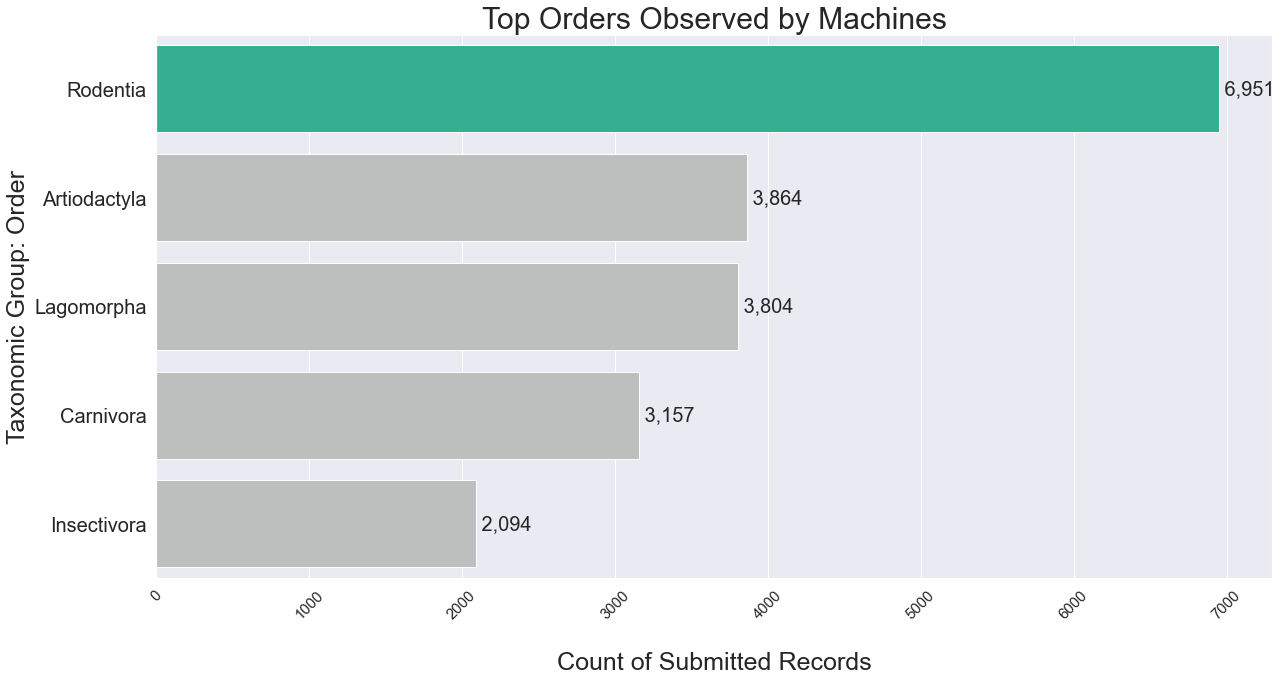

In [107]:
colors = ["#1FC49C", "#BDBFBE", "#BDBFBE", "#BDBFBE", "#BDBFBE"]
sns.set_palette(sns.color_palette(colors))
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(y=top_machine_obs.index, x=top_machine_obs)
ax.set_xlabel("\nCount of Submitted Records", fontsize=25)
ax.set_ylabel("Taxonomic Group: Order", fontsize=25)
ax.set_title("Top Orders Observed by Machines", fontsize=30)
ax.bar_label(ax.containers[0], fontsize=20, fmt=' {:,.0f}')
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.show()

Above suggests that camera traps are likely a common source of records, as bats don't even make the cut!

## Unique Species and Taxon Time ## 

Examining the unique families found in the data

In [14]:
mammals_df.columns

Index(['Scientific name', 'Common name', 'Taxon Rank', 'OSGR',
       'Latitude (WGS84)', 'Longitude (WGS84)', 'Recorder', 'Determiner',
       'Occurrence remarks', 'Identification verification status',
       'Basis of record', 'Data provider', 'Order', 'Family', 'Genus',
       'Vitality', 'Date', 'Year'],
      dtype='object')

In [15]:
mammals_df['Order'].value_counts()

Rodentia           32483
Insectivora        13578
Lagomorpha         11255
Carnivora          10229
Artiodactyla        9347
Chiroptera          4131
Cetartiodactyla      117
Diprotodontia          1
Name: Order, dtype: int64

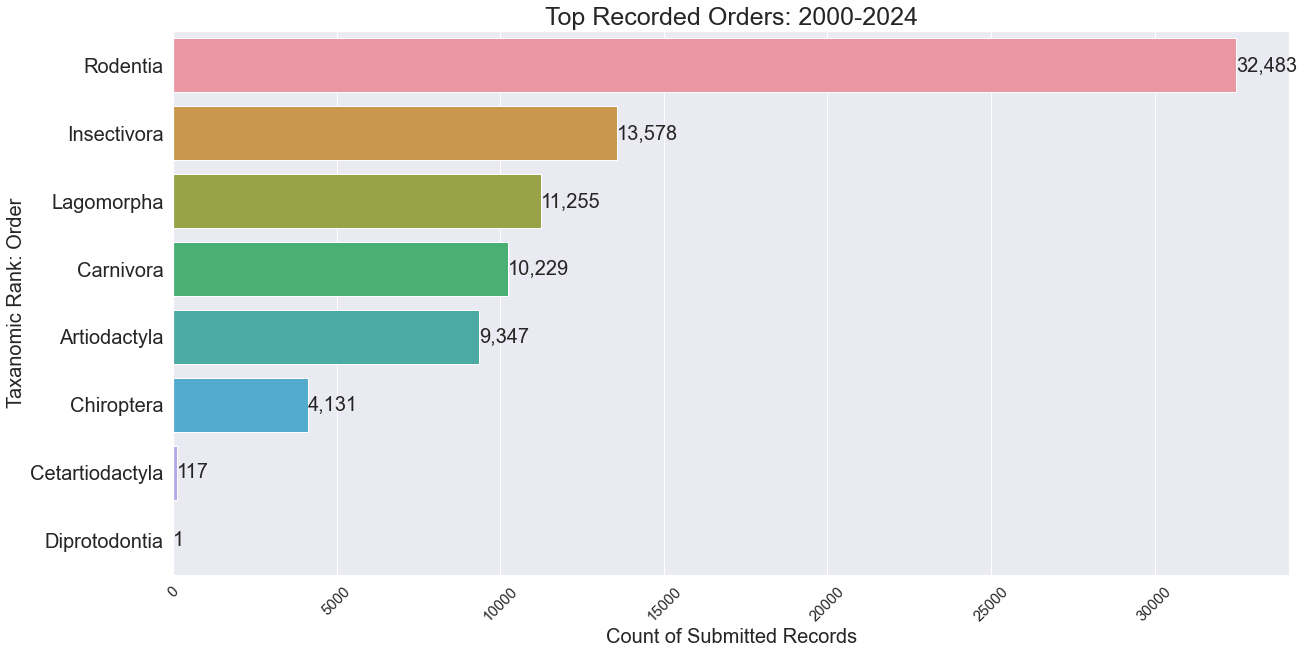

In [108]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(y=mammals_df['Order'], order=mammals_df['Order'].value_counts().index)
ax.set_xlabel("Count of Submitted Records", fontsize=20)
ax.set_ylabel("Taxanomic Rank: Order", fontsize=20)
ax.set_title("Top Recorded Orders: 2000-2024", fontsize=25)
ax.bar_label(ax.containers[0], fontsize=20, fmt='{:,.0f}')
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.show()

# TO DO #
* Find a nicer colour scheme

## Challenge: ##
* Add 'icons' to each bar??

### Explain the graphs time ###
* Rodents are the top order - this is expected as they are some of the most common species, we can look closer at this. 40 % of records. 

* Explain what each Order is in 'common names'

* Highlight the wallaby record - how bizarre! 

* Within these, there are 21 unique families recorded, 47 unique Genus, and 85 species


In [17]:
mammals_df[mammals_df['Order']=='Diprotodontia']

,Scientific name,Common name,Taxon Rank,OSGR,Latitude (WGS84),Longitude (WGS84),Recorder,Determiner,Occurrence remarks,Identification verification status,Basis of record,Data provider,Order,Family,Genus,Vitality,Date,Year
8121,Macropus rufogriseus,Red-necked Wallaby,species,NU2109,55.379012,-1.662251,"Kirby, Melvyn","Kirby, Melvyn",NaN,Accepted,HumanObservation,Mammal Society,Diprotodontia,Macropodidae,Macropus,NaN,2018-06-23,2018


## What about species level?? ##

We have identified 85 unique species in the dataset. Here are the top 10!

In [18]:
mammals_df.groupby('Order')['Common name'].value_counts().nlargest(10)

Order         Common name           
Rodentia      Eastern Grey Squirrel     16776
              Eurasian Red Squirrel     11858
Insectivora   West European Hedgehog    10698
Artiodactyla  Roe Deer                   8975
Lagomorpha    European Rabbit            7329
Carnivora     Red Fox                    4235
Lagomorpha    Brown Hare                 3918
Carnivora     Eurasian Badger            2322
Insectivora   European Mole              1804
Carnivora     Eurasian Otter             1643
Name: Common name, dtype: int64

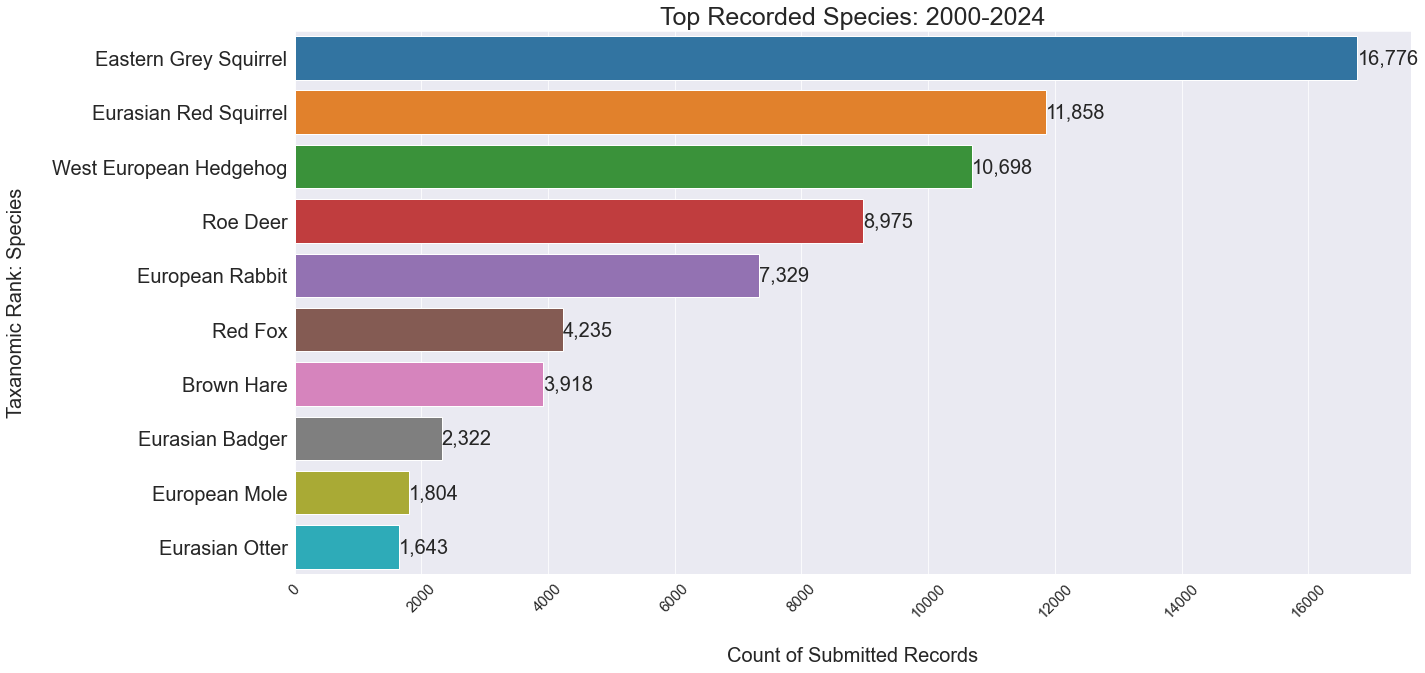

In [19]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=mammals_df['Common name'].value_counts().nlargest(10), 
                 y=mammals_df['Common name'].value_counts().nlargest(10).index)
ax.set_xlabel("\nCount of Submitted Records", fontsize=20)
ax.set_ylabel("Taxanomic Rank: Species\n", fontsize=20)
ax.set_title("Top Recorded Species: 2000-2024", fontsize=25)
ax.bar_label(ax.containers[0], fontsize=20, fmt='{:,.0f}')
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=20)
plt.show()

# TO DO #
* Find a nicer colour scheme - highlight the 2 squirrels and leave the others?
* Better grid ??

## Challenge: ##
* Add 'icons' to each bar??

### Explain the graphs time ###
* Whilst rodents are top, we'd expect more mice or rats in here and see only squirrels.

* All of these species are relatively cute, rare, or exciting. Suggests a potential bias here towards these species.


# Species Level By Order #
An attempt at a dynamic graph: Choose an order, spits out a count graph for family

## *Try tomorrow if time* ##

# MAPS #
Is there a geographical bias towards either populated areas or nature reserves? <br><br>

For this, need to remove sensitive species as they are purposefully given 'noise' 

In [20]:
sensitive_sp = pd.read_csv("data/sensitive_sp.csv")

In [21]:
mammal_unique = list(mammals_df['Scientific name'].unique())

In [22]:
sensitive_mam = [i for i in mammal_unique if i in list(sensitive_sp['scientificName'])]

In [23]:
sensitive_mam

['Lutra lutra',
 'Phocoena phocoena',
 'Halichoerus grypus',
 'Meles meles',
 'Delphinus delphis',
 'Tursiops truncatus',
 'Phoca vitulina',
 'Martes martes',
 'Lagenorhynchus albirostris',
 'Balaenoptera acutorostrata',
 'Muscardinus avellanarius',
 'Stenella coeruleoalba',
 'Castor fiber']

In [24]:
mammal_no_sens = mammals_df[~mammals_df['Scientific name'].isin(sensitive_mam)]

In [25]:
mammal_no_sens.shape

(76506, 18)

In [26]:
import folium
from folium.plugins import HeatMap
lat = mammal_no_sens['Latitude (WGS84)'].median()
lon = mammal_no_sens['Longitude (WGS84)'].median()
folium_hmap = folium.Map(location=[lat,lon], 
                         zoom_start=10, 
                         tiles="openstreetmap")
folium_hmap.add_child(
    HeatMap(mammal_no_sens[['Latitude (WGS84)', 'Longitude (WGS84)']], radius=30, min_opacity=0.2, blur=30))

# Explain explain explain #
* Hotspots around populated areas of Durham, Newcastle, Hexham
* Particular hotspot around Arcot Pond SSSI - a Site of Special Scientific Interest (nationally identified as important site) - however this is very central, so this could be some 'noise' in the data with high level grid references leading to these coordinates - let's look at records with a grid reference of more than 4 length (100m accuracy over 1000m)

In [27]:
mammal_finer_OSGR = mammal_no_sens[mammal_no_sens['OSGR'].str.len()>4]

In [28]:
import folium
from folium.plugins import HeatMap
lat = mammal_finer_OSGR['Latitude (WGS84)'].median()
lon = mammal_finer_OSGR['Longitude (WGS84)'].median()
folium_hmap = folium.Map(location=[lat,lon], 
                         zoom_start=10, 
                         tiles="openstreetmap")
folium_hmap.add_child(
    HeatMap(mammal_finer_OSGR[['Latitude (WGS84)', 'Longitude (WGS84)']], radius=30, min_opacity=0.2, blur=30))

# Explain explain explain #
* Can see Arcot Pond hotspot has drastically reduced.
* New clear hotspots are in Brancepeth, a very nature-friendly looking area
* Another hotspot includes Rainton Meadows, a nature reserve

# Future Analysis #

* What key words appear in the observation comments?
* How are the record counts for these species changing over time?

In [29]:
mammals_df.columns

Index(['Scientific name', 'Common name', 'Taxon Rank', 'OSGR',
       'Latitude (WGS84)', 'Longitude (WGS84)', 'Recorder', 'Determiner',
       'Occurrence remarks', 'Identification verification status',
       'Basis of record', 'Data provider', 'Order', 'Family', 'Genus',
       'Vitality', 'Date', 'Year'],
      dtype='object')

In [30]:
# Observation comments word cloud

df_comments = mammals_df[~mammals_df['Occurrence remarks'].isna()]
text = " ".join(i for i in df_comments['Occurrence remarks'].astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))

There are 768087 words in the combination of all review.


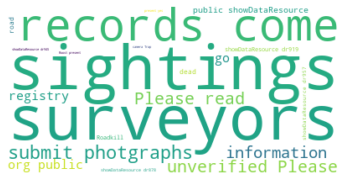

In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image
import numpy as np
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Metadata", "data", "Found", "pictured", "sighting", "volunteer",
                 "https", "nbnatlas"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
# Not very interesting, booo